In [ ]:
# Install the libraries
!pip install kaggle kagglehub -q


In [ ]:
import pandas as pd

In [ ]:
import kagglehub
import os

# This is the missing step:
print("Starting dataset download...")
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print(f"Data downloaded to: {path}")

# This creates the full, correct file path
filepath = os.path.join(path, 'StudentsPerformance.csv')
print(f"The file is ready at: {filepath}")

Starting dataset download...
Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Data downloaded to: /kaggle/input/students-performance-in-exams
The file is ready at: /kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [ ]:
import pandas as pd

# Use the 'filepath' variable from the cell above
# NOT: pd.read_csv('StudentsPerformance.csv')
df = pd.read_csv(filepath)

# Now this will work!
print("File loaded successfully. Here are the first 5 rows:")
df.head()

File loaded successfully. Here are the first 5 rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Get statistics for all number columns
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:

# Checks each column for "null" or missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
print("--- Gender Breakdown ---")
print(df['gender'].value_counts())
print("\n--- Race/Ethnicity Breakdown ---")
print(df['race/ethnicity'].value_counts())
print("\n--- Parental Education Breakdown ---")
print(df['parental level of education'].value_counts())

--- Gender Breakdown ---
gender
female    518
male      482
Name: count, dtype: int64

--- Race/Ethnicity Breakdown ---
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

--- Parental Education Breakdown ---
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [ ]:
# Group by gender and find the average scores
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [ ]:
# Group by education and find the average scores
# We sort it to make it easier to read
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().sort_values(by='math score', ascending=False)

,math score,reading score,writing score
parental level of education,,,
master's degree,69.745763,75.372881,75.677966
bachelor's degree,69.389831,73.000000,73.381356
associate's degree,67.882883,70.927928,69.896396
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
high school,62.137755,64.704082,62.448980


In [ ]:
# Find the correlation between the scores
df[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [ ]:
# Check each column for any missing (null) values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- Graph 2: Does parental education affect math scores? ---
print("Creating boxplot...")
plt.figure(figsize=(12, 7))
# We sort the boxes by the average score to make it easier to read
order = df.groupby('parental level of education')['math score'].mean().sort_values().index

Creating boxplot...


<Figure size 1200x700 with 0 Axes>

In [ ]:
# Import all the tools we need from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Model Average Error (RMSE): 5.39 points


--- Comparing Actual vs. Predicted Scores (First 10) ---
     Actual Score  Predicted Score  Difference
521            91            76.39       14.61
737            53            58.89       -5.89
740            80            76.99        3.01
660            74            76.85       -2.85
411            84            87.63       -3.63
678            81            79.01        1.99
626            69            64.65        4.35
513            54            53.01        0.99
859            87            74.18       12.82
136            51            49.21        1.79


🎉 TASK 1 IS FULLY COMPLETE! 🎉


Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
--- Missing values in each column: ---
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64




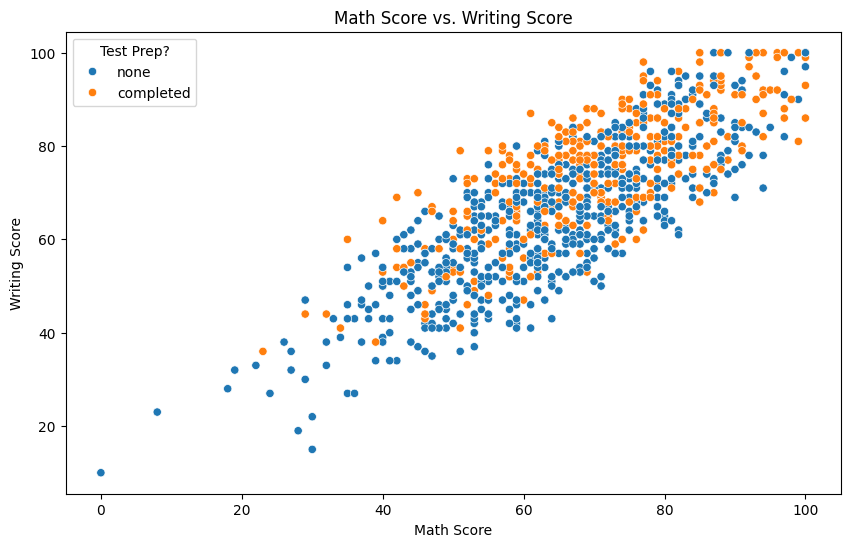

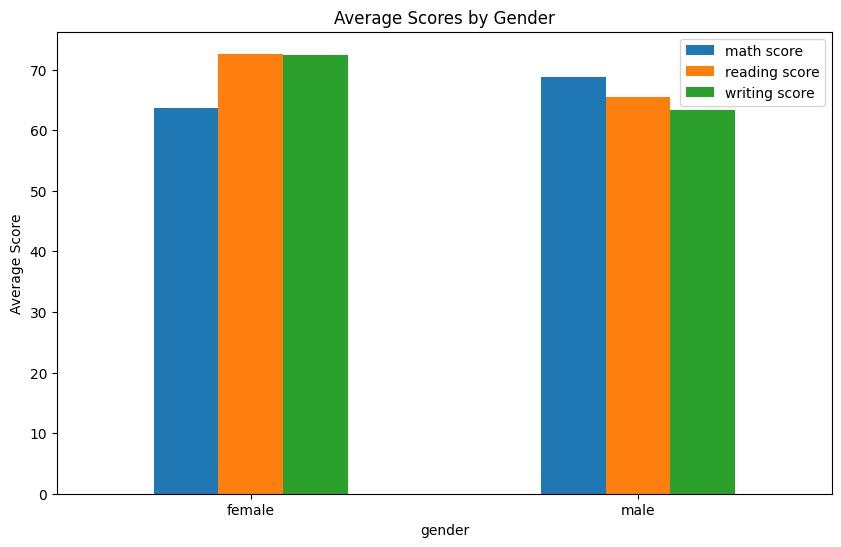


Model's Average Error (RMSE): 5.39 points

--- Comparing Actual vs. Predicted Scores (First 10) ---
     Actual Score  Predicted Score  Difference
521            91            76.39       14.61
737            53            58.89       -5.89
740            80            76.99        3.01
660            74            76.85       -2.85
411            84            87.63       -3.63
678            81            79.01        1.99
626            69            64.65        4.35
513            54            53.01        0.99
859            87            74.18       12.82
136            51            49.21        1.79

🎉 TASK 1 IS FULLY COMPLETE! 🎉


In [ ]:
!pip install kaggle kagglehub -q
import os


import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
filepath = os.path.join(path, 'StudentsPerformance.csv')
df = pd.read_csv(filepath)

print("--- Missing values in each column: ---")
print(df.isnull().sum())
print("\n")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math score', y='writing score', hue='test preparation course')
plt.title('Math Score vs. Writing Score')
plt.ylabel('Writing Score')
plt.xlabel('Math Score')
plt.legend(title='Test Prep?')
plt.show()

gender_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

df_processed = pd.get_dummies(df, drop_first=True)

y = df_processed['math score']
X = df_processed.drop('math score', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"\nModel's Average Error (RMSE): {rmse:.2f} points\n")

results = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': predictions})
results['Predicted Score'] = results['Predicted Score'].round(2)
results['Difference'] = (results['Actual Score'] - results['Predicted Score']).round(2)

print("--- Comparing Actual vs. Predicted Scores (First 10) ---")
print(results.head(10))
print("\n" + "="*50)
print("🎉 TASK 1 IS FULLY COMPLETE! 🎉")
print("="*50)